# Independent Lab: Descriptive Statistics

**Intro to Python**  
**Descriptive Statistics**  
**Cody Thompson**  
**Date:** 4/28/2025

Welcome to my notebook for the Descriptive Statistics lab! In this notebook, I will be working with the hospital and personnel data to conduct a series of descriptive analyses. This includes merging the datasets, cleaning the data, calculating summary statistics, and creating visualizations to explore the data. The goal is to prepare the data for potential modeling while providing insightful summaries and visual assessments of key variables.


In [3]:
# load modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts # for QQ plot
from scipy.stats import pearsonr # correlation p-values
from sklearn.linear_model import LinearRegression # regression output
import statsmodels.formula.api as smf # ols regression

In [6]:
# Set working directory
os.chdir("C://Users//cthom//Downloads//BGEN 632 Intro to Python//GitHub_Repos//Week 9//week9labs//data")  # Replace with your path
os.getcwd()  # Confirm change

'C:\\Users\\cthom\\Downloads\\BGEN 632 Intro to Python\\GitHub_Repos\\Week 9\\week9labs\\data'

In [7]:
# Load hospital and personnel data
hospital_df = pd.read_csv('CaliforniaHospitalData.csv')
personnel_df = pd.read_csv('CaliforniaHospitalData_Personnel.txt', delimiter='\t')

# Quick inspect
hospital_df.info()
personnel_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HospitalID   61 non-null     int64  
 1   Name         61 non-null     object 
 2   Zip          61 non-null     object 
 3   Website      61 non-null     object 
 4   TypeControl  61 non-null     object 
 5   Teaching     61 non-null     object 
 6   DonorType    61 non-null     object 
 7   NoFTE        61 non-null     float64
 8   NetPatRev    61 non-null     float64
 9   InOperExp    61 non-null     float64
 10  OutOperExp   61 non-null     float64
 11  OperRev      61 non-null     int64  
 12  OperInc      61 non-null     int64  
 13  AvlBeds      61 non-null     int64  
dtypes: float64(4), int64(4), object(6)
memory usage: 6.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------      

In [8]:
# Merging Data and Cleaning Columns
# Merge the hospital and personnel data on the 'HospitalID' column
merged_df = pd.merge(hospital_df, personnel_df, on='HospitalID', how='inner')

# Remove unnecessary columns
merged_df.drop(columns=['Work_ID', 'PositionID', 'Website'], inplace=True)

# Display the first few rows of the merged DataFrame
merged_df.head()


,HospitalID,Name,Zip,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,OutOperExp,...,AvlBeds,LastName,FirstName,Gender,PositionTitle,Compensation,MaxTerm,StartDate,Phone,Email
0,45740,Mammoth Hospital,93546-0660,District,Small/Rural,Charity,327.0,135520.2186,20523425.53,34916220.47,...,15,Web,David,M,Safety Inspection Member,23987,2,1/1/2012,785-532-2452,david.web@comenitymed.com
1,12145,Victor Valley Community Hospital,92392,Non Profit,Small/Rural,Charity,345.0,136156.6913,33447542.78,20348596.22,...,99,Rodriguez,Jose,M,Regional Representative,46978,4,1/1/2009,405-744-2238,jose.rodriguez@edihealth.com
2,25667,Pioneers Memorial Hospital,92227,District,Small/Rural,Charity,601.2,197094.2541,37254178.67,37832448.33,...,107,Adamson,David,M,Regional Representative,46978,4,1/1/2012,785-532-7573,david.adamson@txbiomed.net
3,46996,Ridgecrest Regional Hospital,93555,Non Profit,Small/Rural,Charity,400.0,139170.3798,23385570.10,24661355.90,...,55,Roberts,Melissa,F,Safety Inspection Member,23987,2,1/1/2009,785-532-9779,melissa.roberts@txbiomed.net
4,37393,Barstow Community Hospital,92311,Investor,Small/Rural,Charity,262.0,116797.8306,13684502.49,15159986.51,...,42,Iwata,Akira,M,Regional Representative,46978,4,1/1/2011,801-611-9161,akira.iwata@hsu.edu


In [15]:
# Inserting New Record
# Insert New Records with specified columns
new_employee = {
    'HospitalID': 46996,  
    'Name': 'Ridgecrest Regional Hospital',
    'Zip': '93555',
    'TypeControl': 'Non Profit',
    'Teaching': 'Small/Rural',
    'DonorType': 'Charity',
    'NoFTE': 100,
    'NetPatRev': 50000,
    'InOperExp': 100000, 
    'OutOperExp': 200000,
    'OperRev': 300000,
    'OperInc': 10000,  
    'AvlBeds': 50,
    'PositionTitle': 'Regional Representative',
    'Compensation': 46978,
    'MaxTerm': 4,
    'Phone': 890-123-4567,
    'Email': 'email@email.com',
    'StartDate': pd.to_datetime('2025-04-28'),
    'Gender': 'M',
    'LastName': 'Thompson',
    'FirstName': 'Cody'
}

# Convert the new record to DataFrame
new_employee_df = pd.DataFrame([new_employee])

# Concatenate the new record with the existing DataFrame
merged_df = pd.concat([merged_df, new_employee_df], ignore_index=True)

# Display the updated DataFrame
merged_df.tail(1)


,HospitalID,Name,Zip,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,OutOperExp,...,AvlBeds,LastName,FirstName,Gender,PositionTitle,Compensation,MaxTerm,StartDate,Phone,Email
65,46996,Ridgecrest Regional Hospital,93555,Non Profit,Small/Rural,Charity,100.0,50000.0,100000.0,200000.0,...,50,Thompson,Cody,M,Regional Representative,46978,4,2025-04-28 00:00:00,-3800,email@email.com


In [16]:
# Convert date columns to datetime
merged_df['StartDate'] = pd.to_datetime(merged_df['StartDate'])

# Convert object columns to categorical
categorical_columns = ['TypeControl', 'Teaching', 'DonorType', 'Gender']
merged_df[categorical_columns] = merged_df[categorical_columns].apply(lambda x: x.astype('category'))

# Confirm the changes
merged_df.dtypes


HospitalID                int64
Name                     object
Zip                      object
TypeControl            category
Teaching               category
DonorType              category
NoFTE                   float64
NetPatRev               float64
InOperExp               float64
OutOperExp              float64
OperRev                   int64
OperInc                   int64
AvlBeds                   int64
LastName                 object
FirstName                object
Gender                 category
PositionTitle            object
Compensation              int64
MaxTerm                   int64
StartDate        datetime64[ns]
Phone                    object
Email                    object
dtype: object

In [18]:
# Descriptive Statistics 
# Summary statistics for numeric variables
numeric_summary = merged_df.describe().loc[['mean', '50%', 'min', 'max']]

# Display the summary statistics
numeric_summary


,HospitalID,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds,Compensation,MaxTerm,StartDate
mean,32977.515152,1255.547273,6.226454e+05,1.536819e+08,8.334308e+07,2.368814e+08,-1.428226e+05,183.575758,89305.272727,4.227273,2011-03-28 05:27:16.363636480
50%,34706.500000,356.000000,1.424520e+05,2.601659e+07,2.725413e+07,5.348540e+07,1.005938e+06,85.500000,46978.000000,4.000000,2011-01-01 00:00:00
min,10767.000000,55.000000,1.417224e+04,1.000000e+05,2.000000e+05,3.000000e+05,-3.211633e+08,12.000000,23987.000000,2.000000,2002-01-01 00:00:00
max,46996.000000,8000.000000,4.662582e+06,1.285631e+09,6.621559e+08,1.912179e+09,1.648724e+08,909.000000,248904.000000,8.000000,2025-04-28 00:00:00


In [19]:
# Descriptive Statistics 
# Summary statistics for categorical variables
categorical_summary = merged_df.describe(include=['category'])

# Display the summary statistics
categorical_summary


,TypeControl,Teaching,DonorType,Gender
count,66,66,66,66
unique,4,2,2,2
top,Non Profit,Small/Rural,Charity,M
freq,42,49,49,34


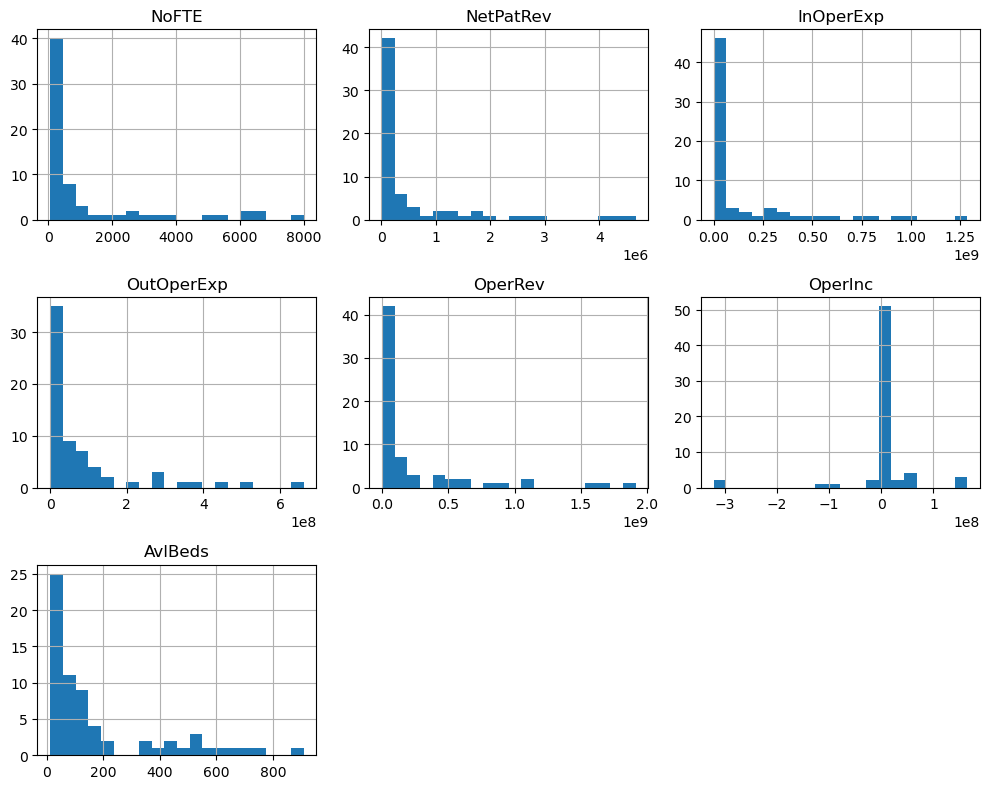

In [20]:
# Create histograms for selected numeric variables
numeric_columns = ['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']
merged_df[numeric_columns].hist(bins=20, figsize=(10, 8), layout=(3, 3))

# Display the plot
plt.tight_layout()
plt.show()


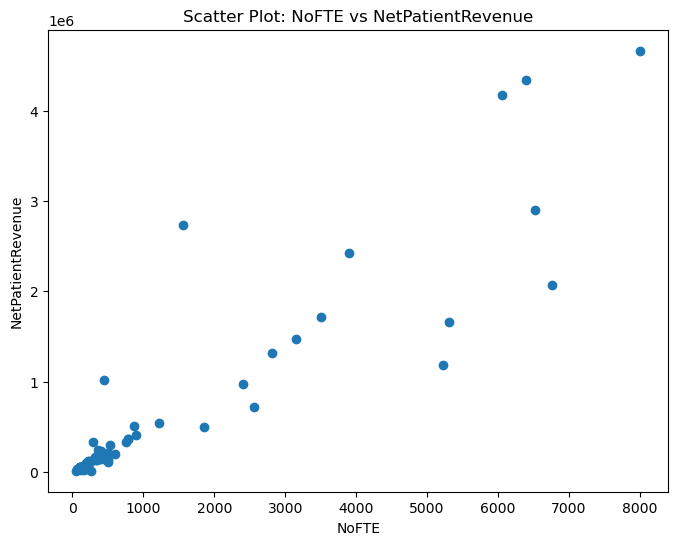

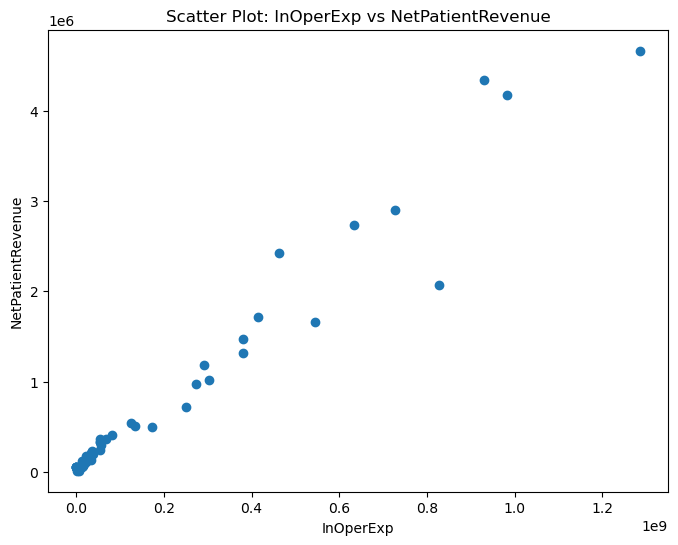

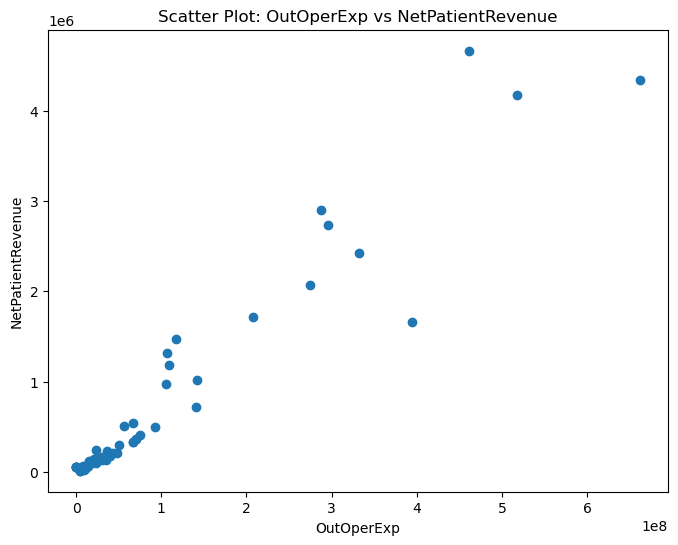

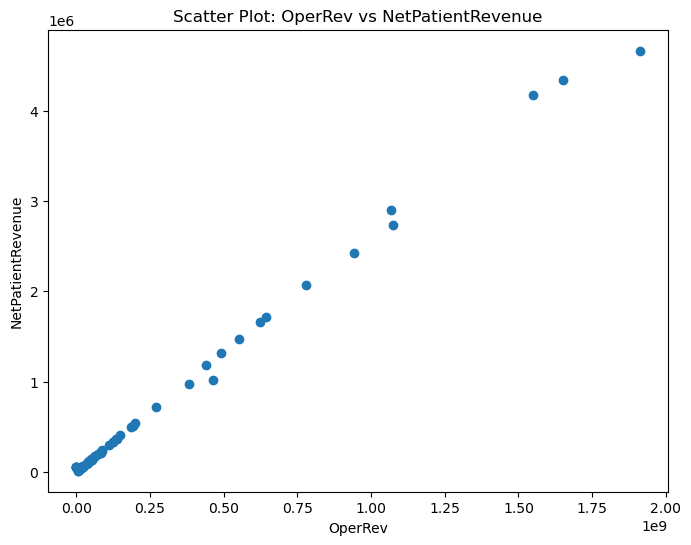

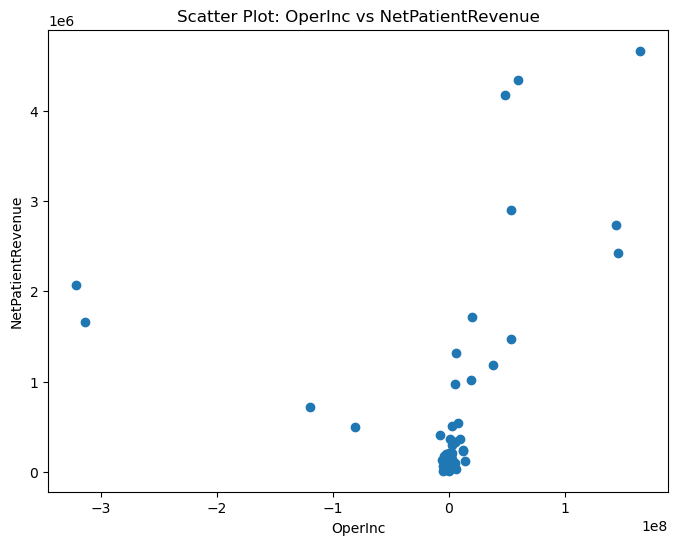

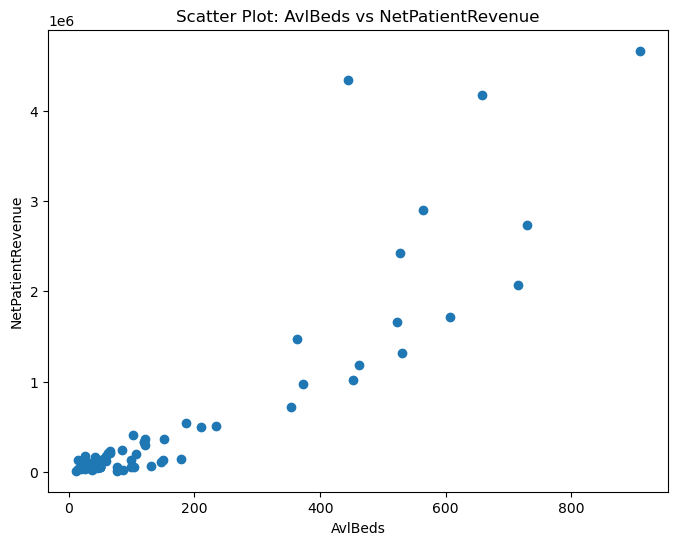

In [21]:
# Create scatter plots with 'NetPatRev' as the target variable
for col in numeric_columns:
    if col != 'NetPatRev':
        plt.figure(figsize=(8, 6))
        plt.scatter(merged_df[col], merged_df['NetPatRev'])
        plt.xlabel(col)
        plt.ylabel('NetPatientRevenue')
        plt.title(f'Scatter Plot: {col} vs NetPatientRevenue')
        plt.show()


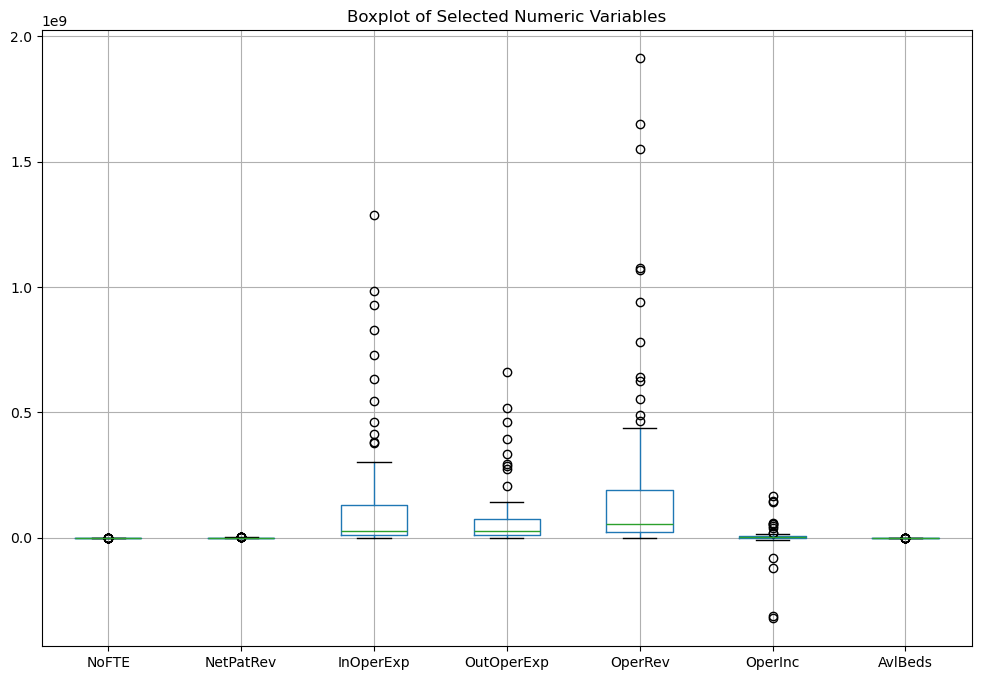

In [22]:
# Boxplot to assess outliers for selected numeric variables
plt.figure(figsize=(12, 8))
merged_df[numeric_columns].boxplot()
plt.title('Boxplot of Selected Numeric Variables')
plt.show()


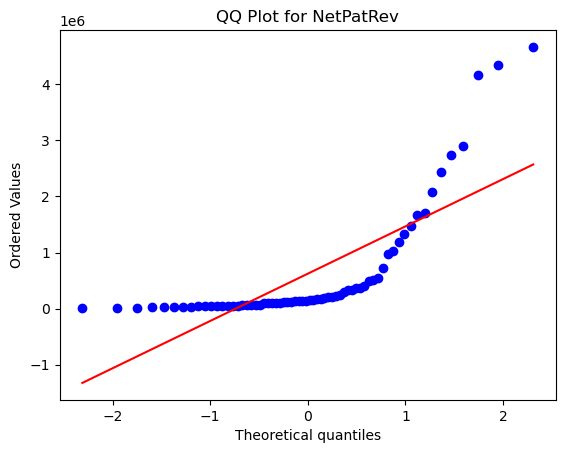

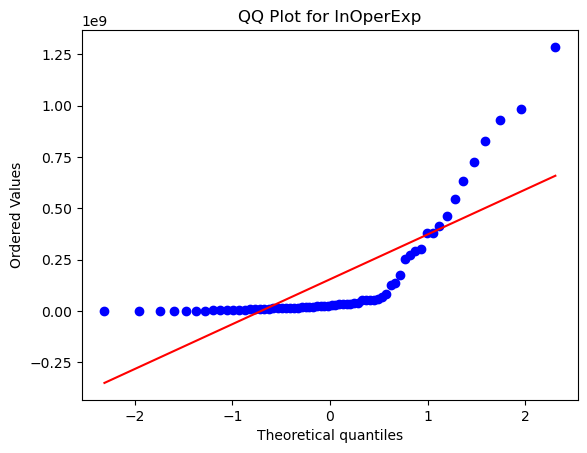

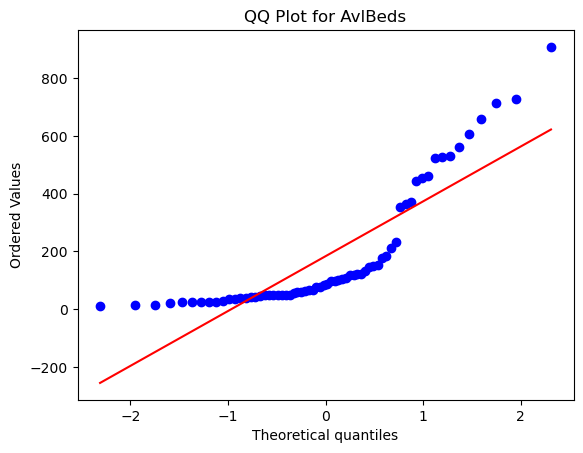

In [23]:
# Select three variables for QQ plot
qq_vars = ['NetPatRev', 'InOperExp', 'AvlBeds']

# Generate QQ plots for the selected variables
for var in qq_vars:
    sts.probplot(merged_df[var].dropna(), dist="norm", plot=plt)
    plt.title(f'QQ Plot for {var}')
    plt.show()


In [24]:
# Perform Shapiro-Wilk test for normality
for var in qq_vars:
    stat, p_value = sts.shapiro(merged_df[var].dropna())
    print(f'Shapiro-Wilk Test for {var}: Statistics={stat}, p-value={p_value}')


Shapiro-Wilk Test for NetPatRev: Statistics=0.6016511209501683, p-value=4.216123739669787e-12
Shapiro-Wilk Test for InOperExp: Statistics=0.609227016590569, p-value=5.6305061873598165e-12
Shapiro-Wilk Test for AvlBeds: Statistics=0.7382733219251838, p-value=1.6031886733527994e-09
